# Evaluating Turbulence and Systematic Risk of Financial Markets

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

## 1. Fetch data (returns of all assets over entire history)

### Historical data

#### Australian Dollar

In [7]:
aud = yf.Ticker("AUDUSD=X")

# aud.info
aud_history = aud.history(period='10y', interval='1wk')
aud_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-14,0.989511,0.989511,0.979912,0.982898,0,0,0
2012-05-21,0.983768,0.993937,0.970685,0.982318,0,0,0
2012-05-28,0.981547,0.989903,0.958497,0.965997,0,0,0
2012-06-04,0.964599,1.000300,0.963206,0.998403,0,0,0
2012-06-11,0.998403,1.013366,0.986777,1.011225,0,0,0
...,...,...,...,...,...,...,...
2022-04-25,0.723694,0.723338,0.705570,0.710884,0,0,0
2022-05-02,0.706539,0.726528,0.703408,0.712100,0,0,0
2022-05-09,0.704700,0.705189,0.684470,0.687191,0,0,0


/Users/tom/opt/miniconda3/envs/ThesisEnv/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


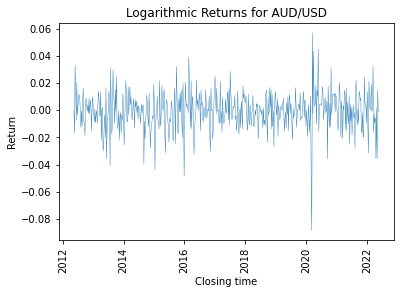

In [8]:
# computing/plotting returns
aud_log_returns = (np.log(aud_history.Close) - np.log(aud_history.Close.shift(1))).shift(-1)
aud_log_returns.dropna(inplace=True)

plt.plot(aud_log_returns, linewidth=0.4)
plt.xlabel('Closing time')
plt.ylabel('Return')
plt.title(f'Logarithmic Returns for AUD/USD')
plt.xticks(rotation=90)
plt.show()

#### US Dollar Index
USDX proportions:
- EUR = 57.6\%
- JPY = 13.6\%
- GBP = 11.9\%
- CAD = 9.1\%
- SEK = 4.2\%
- CHF = 3.6\%

In [9]:
# Euro
eur = yf.Ticker("EURUSD=X")
eur_history = eur.history(period='10y', interval='1wk')
eur_log_returns = (np.log(eur_history.Close) - np.log(eur_history.Close.shift(1))).shift(-1)
eur_log_returns.dropna(inplace=True)

# Yen
jpy = yf.Ticker("JPYUSD=X")
jpy_history = jpy.history(period='10y', interval='1wk')
jpy_log_returns = (np.log(jpy_history.Close) - np.log(jpy_history.Close.shift(1))).shift(-1)
jpy_log_returns.dropna(inplace=True)

# Pound
gbp = yf.Ticker("GBPUSD=X")
gbp_history = gbp.history(period='10y', interval='1wk')
gbp_log_returns = (np.log(gbp_history.Close) - np.log(gbp_history.Close.shift(1))).shift(-1)
gbp_log_returns.dropna(inplace=True)

# Canadian dollar
cad = yf.Ticker("CADUSD=X")
cad_history = cad.history(period='10y', interval='1wk')
cad_log_returns = (np.log(cad_history.Close) - np.log(cad_history.Close.shift(1))).shift(-1)
cad_log_returns.dropna(inplace=True)

# Krona
sek = yf.Ticker("SEKUSD=X")
sek_history = sek.history(period='10y', interval='1wk')
sek_log_returns = (np.log(sek_history.Close) - np.log(sek_history.Close.shift(1))).shift(-1)
sek_log_returns.dropna(inplace=True)

# Franc
chf = yf.Ticker("CHFUSD=X")
chf_history = chf.history(period='10y', interval='1wk')
chf_log_returns = (np.log(chf_history.Close) - np.log(chf_history.Close.shift(1))).shift(-1)
chf_log_returns.dropna(inplace=True)

# All USDX
usdx_assets = {
    'EUR': eur_log_returns,
    'JPY': jpy_log_returns,
    'GBP': gbp_log_returns,
    'CAD': cad_log_returns,
    'SEK': sek_log_returns,
    'CHF': chf_log_returns
}

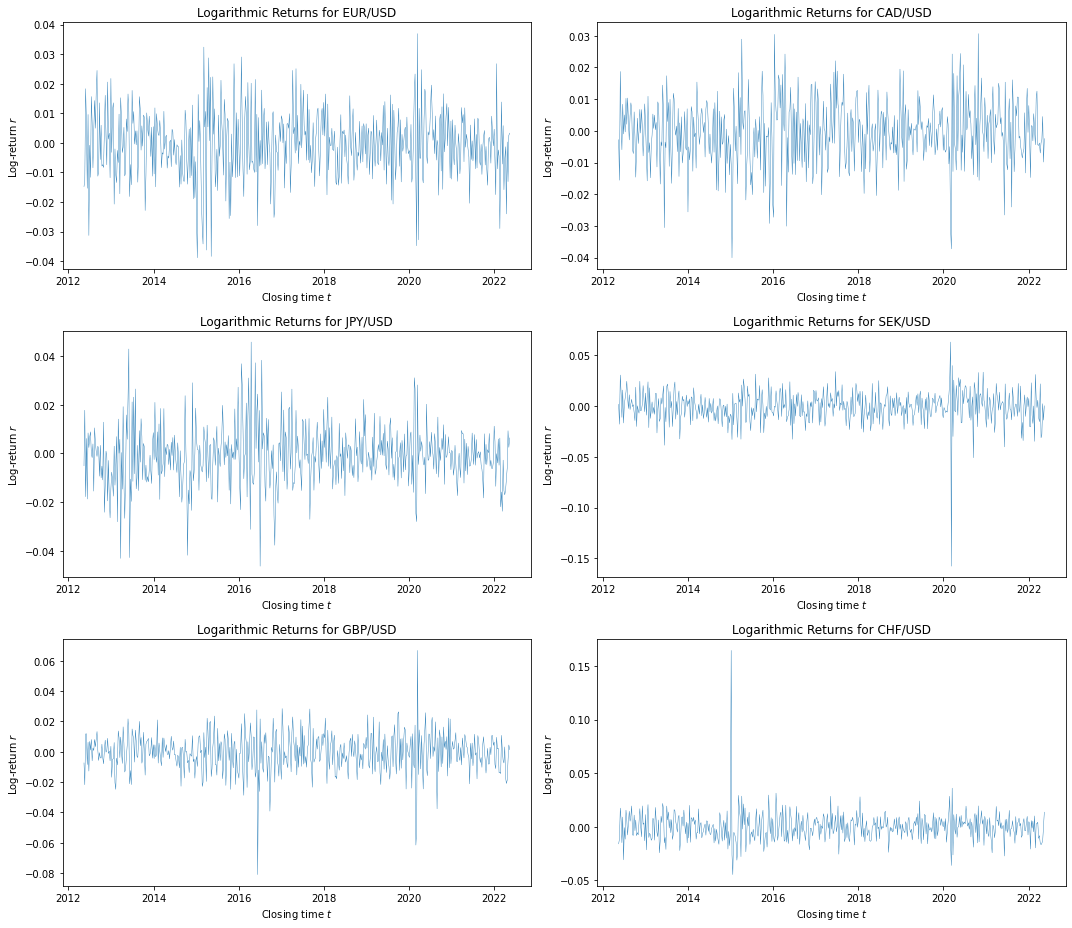

In [69]:
# plot log returns for all assets in USDX
x, y = (3, 2)
fig, ax = plt.subplots(x, y, figsize=(15, 13))
usdx_keys = list(usdx_assets.keys())

for j in  range(y):
    for i in range(x):
        key = usdx_keys[x * j + i]
        ax[i, j].plot(usdx_assets[key], linewidth=0.4)
        ax[i, j].set(title=f'Logarithmic Returns for {key}/USD', xlabel=r'Closing time $t$', ylabel=r'Log-return $r$')

plt.tight_layout()
plt.show()